The original image from DeepGlobe dataset had shape of (2448,2448,3) which is computationally expensive to process and resizing it to very small size will result in lost of important features.

Therefore i divede the image into 16 parts resulting in more data and computation friendly image shape of (256,256,3) in addition with not lussing important features.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import os
from tqdm import tqdm

In [187]:
dir_path = "D:/Machine_Learning_DATA_Project/Deep Globe/"
csv_path = "metadata.csv"
train_path = "train/"
test_path = "test/"
val_path = "valid/"
save_imgs = 'D:/Machine_Learning_DATA_Project/Deep Globe/reshaped_1024/train/images/'
save_masks = 'D:/Machine_Learning_DATA_Project/Deep Globe/reshaped_1024/train/masks/'

In [220]:
df = pd.read_csv(dir_path + csv_path)
train_df = df[df['split']=='train']

img_names = train_df['sat_image_path']
mask_names = train_df['mask_path']

names_arr = np.array(img_names)
mask_arr = np.array(mask_names)

In [233]:
patch_size = (256, 256)
for y in mask_arr:
    mask = cv2.imread(dir_path + y)
    mask = cv2.resize(mask,(1024,1024))
    x = 0
    for i in range(4):
        for j in range(4):
            start_row, end_row = i * patch_size[0], (i + 1) * patch_size[0]
            start_col, end_col = j * patch_size[1], (j + 1) * patch_size[1]
            patch = mask[start_row:end_row, start_col:end_col, :]
            cv2.imwrite(save_masks + y[6:-4] + "_"+ str(x) + ".png",patch)
            x+=1

In [226]:
patch_size = (256, 256)
for y in names_arr:
    img = cv2.imread(dir_path + y)
    img = cv2.resize(img,(1024,1024))
    x = 0
    for i in range(4):
        for j in range(4):
            start_row, end_row = i * patch_size[0], (i + 1) * patch_size[0]
            start_col, end_col = j * patch_size[1], (j + 1) * patch_size[1]
            patch = img[start_row:end_row, start_col:end_col, :]
            cv2.imwrite(save_imgs + y[6:-4] + "_"+ str(x) + ".jpg",patch)
            x+=1

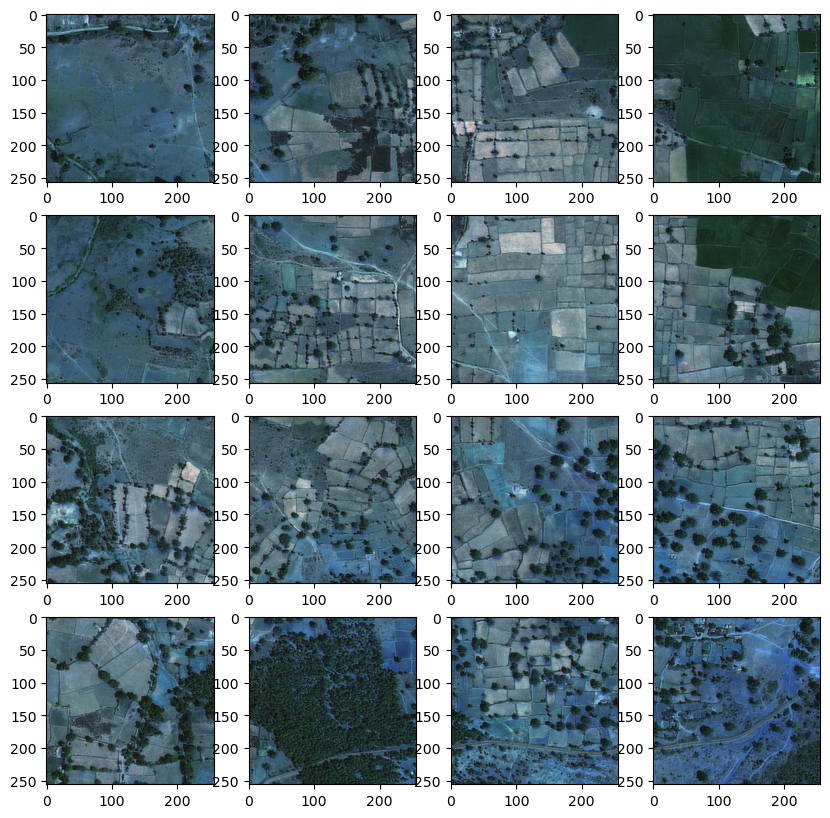

In [170]:
fig,axs = plt.subplots(4,4,figsize=(10,10))
x=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(small_images[x])
        x+=1

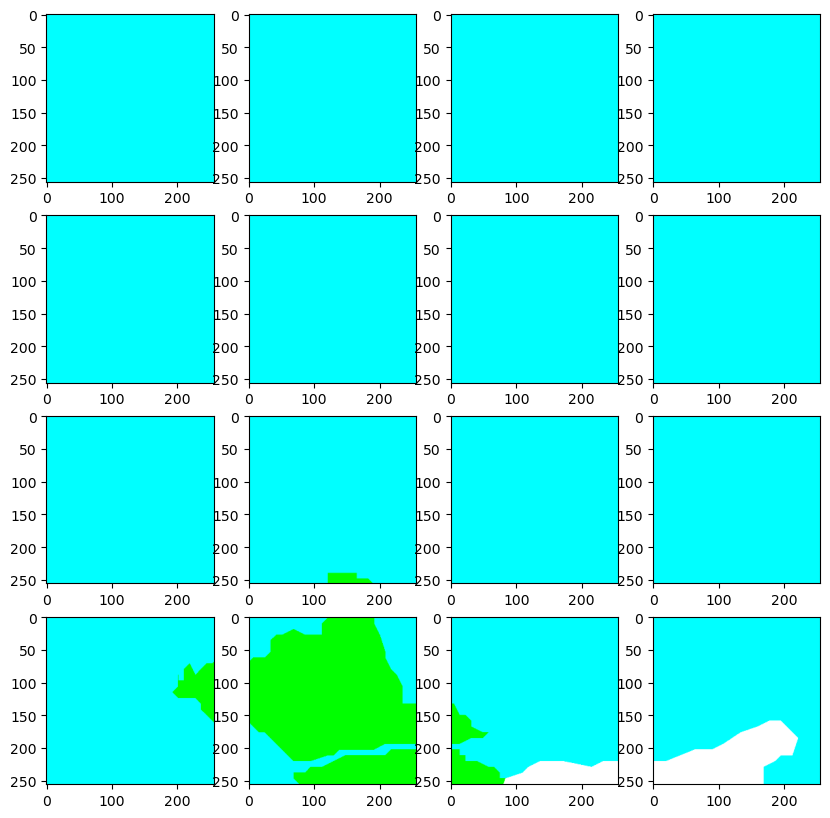

In [172]:
fig,axs = plt.subplots(4,4,figsize=(10,10))
x=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(small_mask[x])
        x+=1